<a href="https://colab.research.google.com/github/kellykabura/project-lungcancer/blob/main/lungcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Load and Explore the Data


In [55]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv("/content/cancer patient data sets.csv")

In [ ]:
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
data.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [58]:
data.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [59]:
data.isnull().sum()

,0
index,0
Patient Id,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0


Data Cleaning(Handle missing values and ensure data types are appropriate)

In [61]:
#Drop unnecessary columns
new_data = data.drop(columns=['index','Patient Id', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring',])

new_data


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Level
0,33,1,2,4,5,4,3,2,2,4,3,2,Low
1,17,1,3,1,5,3,4,2,2,2,2,4,Medium
2,35,1,4,5,6,5,5,4,6,7,2,3,High
3,37,1,7,7,7,7,6,7,7,7,7,7,High
4,46,1,6,8,7,7,7,6,7,7,8,7,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,7,8,High
996,37,2,6,8,7,7,7,6,7,7,7,8,High
997,25,2,4,5,6,5,5,4,6,7,2,3,High
998,18,2,6,8,7,7,7,6,7,7,8,7,High


Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

DISTRIBUTION OF LUNG CANCER SEVERITY LEVEL


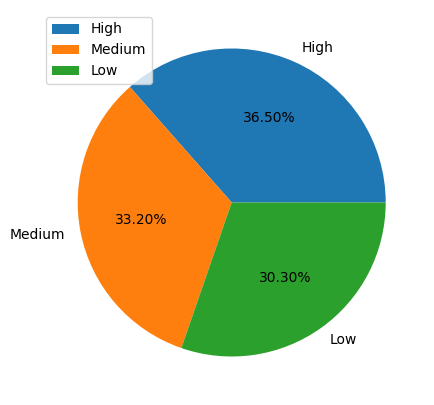

In [ ]:
#Let us see how are target variable is distributed in the dataset
tdata=new_data['Level'].value_counts().reset_index()
plt.figure(figsize=(15,5))
plt.pie(x=tdata['count'],labels=tdata['Level'],autopct='%.2f%%')
plt.legend(tdata['Level'])
plt.show()
#the dataset is balnced and is not biased

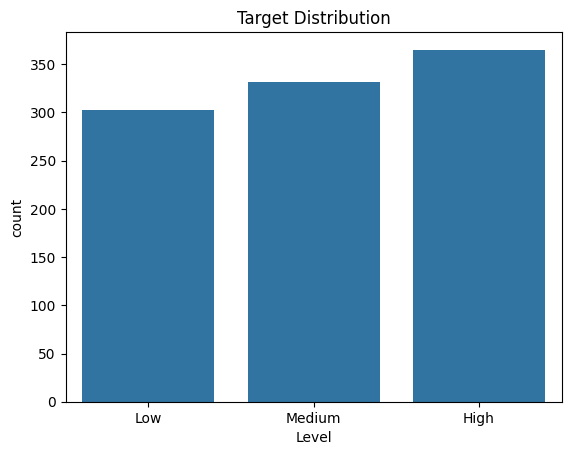

In [ ]:
#Let's check the distributaion of Target variable.
sns.countplot(x='Level', data= new_data,)
plt.title('Target Distribution');

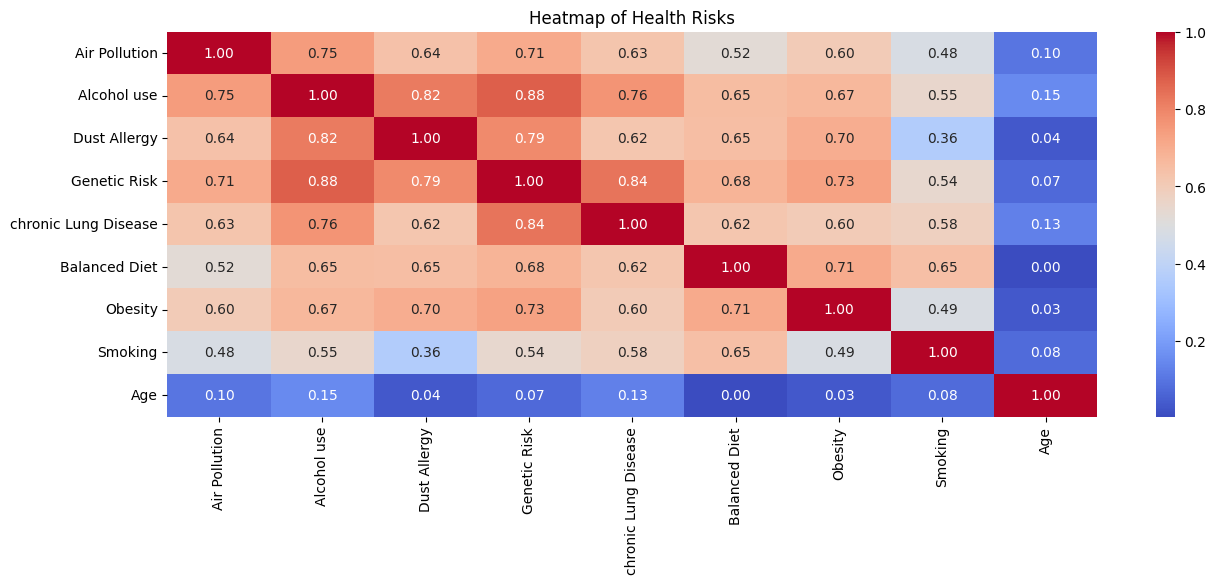

In [ ]:
#Let us look how some of the Risk, Allergies and behavious are related to each other
corr= new_data[['Air Pollution', 'Alcohol use', 'Dust Allergy', 'Genetic Risk',
            'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking','Age']].corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Health Risks')
plt.show()

Now let's do some Data Visualizations for the better understanding of how the independent features are related to the target variable..


In [ ]:
# function for plotting
def plot(col, new_data= new_data):
    return new_data.groupby(col)['Level'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='Age'>

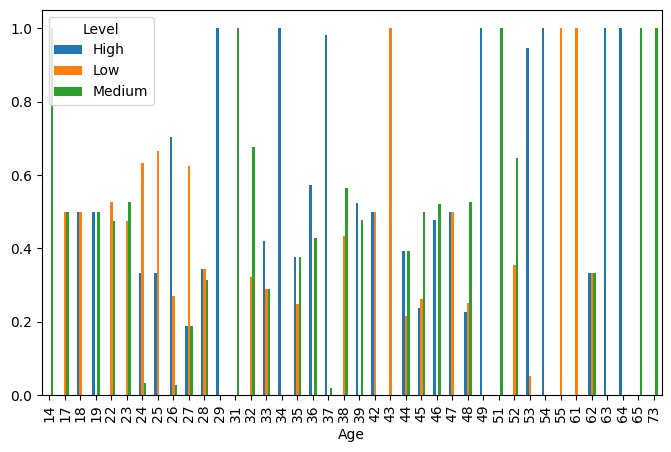

In [ ]:
plot('Age')

<Axes: xlabel='Air Pollution'>

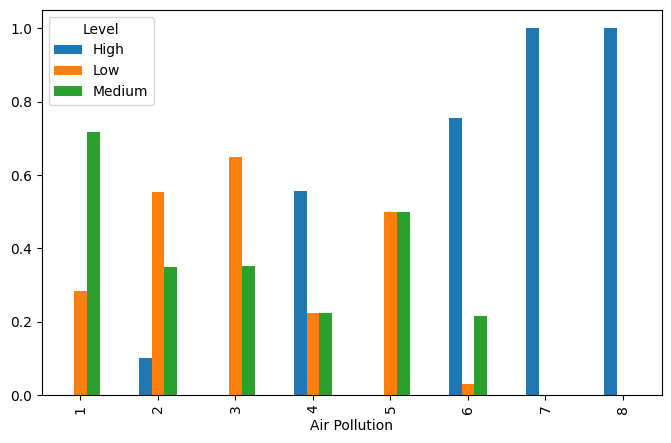

In [ ]:
plot('Air Pollution')

<Axes: xlabel='Alcohol use'>

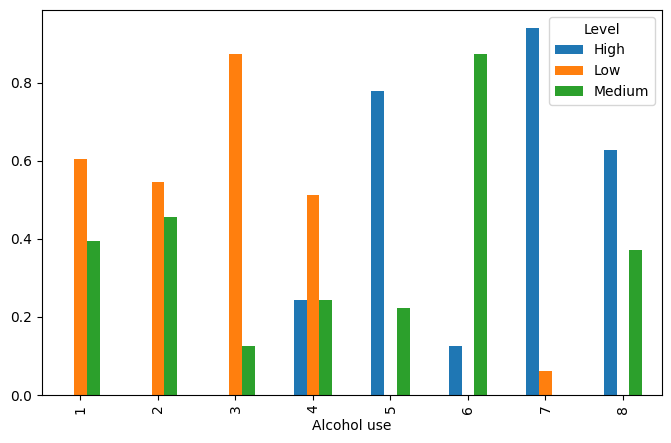

In [ ]:
plot('Alcohol use')

<Axes: xlabel='Obesity'>

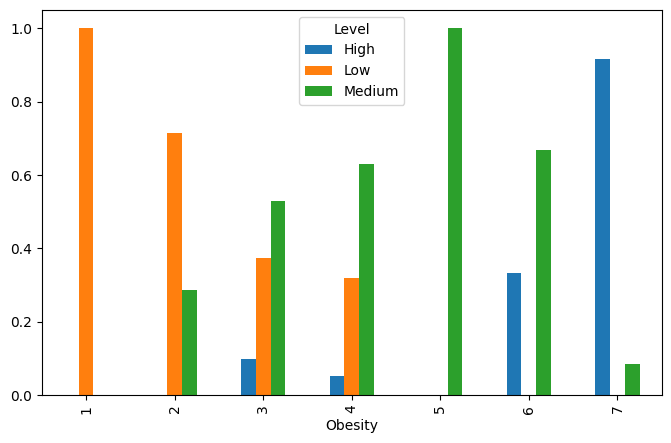

In [ ]:
plot('Obesity')

<Axes: xlabel='Balanced Diet'>

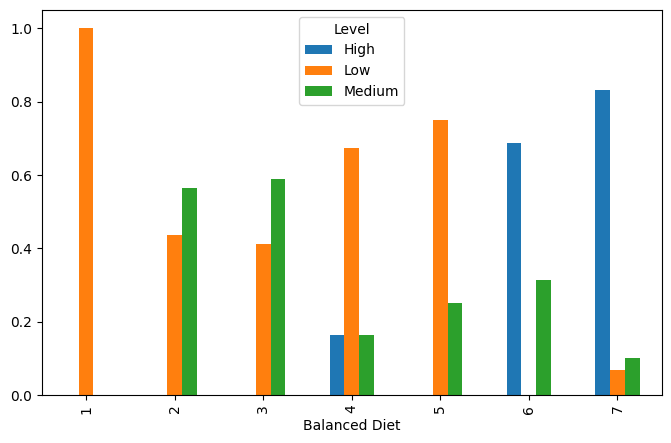

In [ ]:
plot('Balanced Diet')

<Axes: xlabel='Gender'>

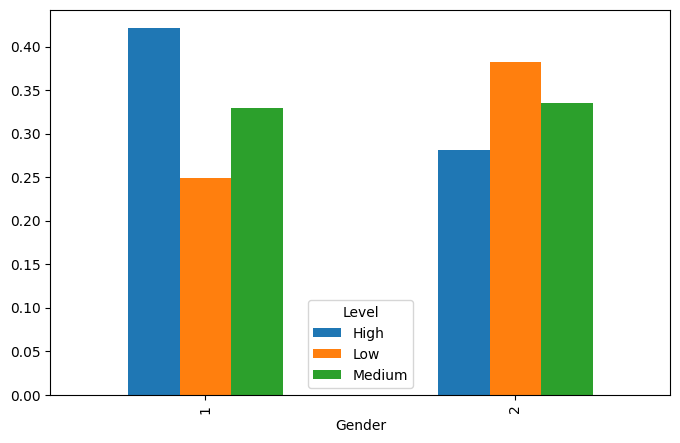

In [66]:
plot('Gender')

<Axes: xlabel='Smoking'>

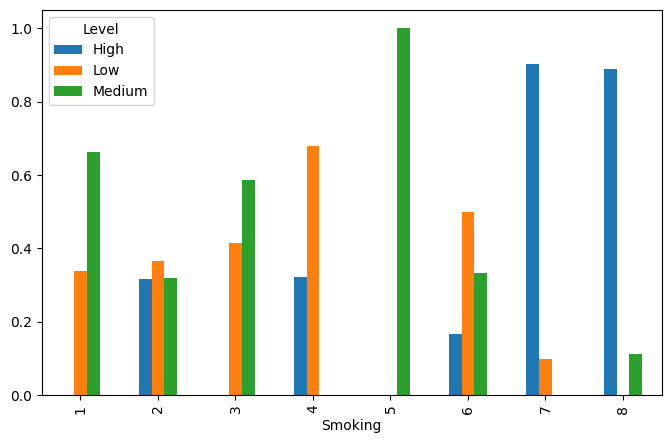

In [69]:
plot('Smoking')

<Axes: xlabel='Genetic Risk'>

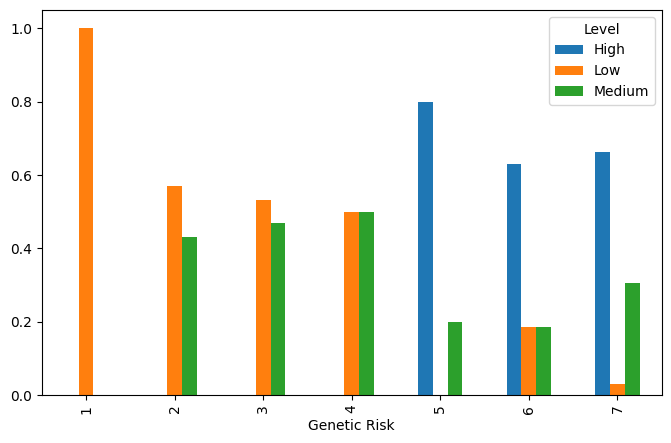

In [ ]:
plot('Genetic Risk')

BIVARIATE ANALYSIS- what is the correlation between two variables

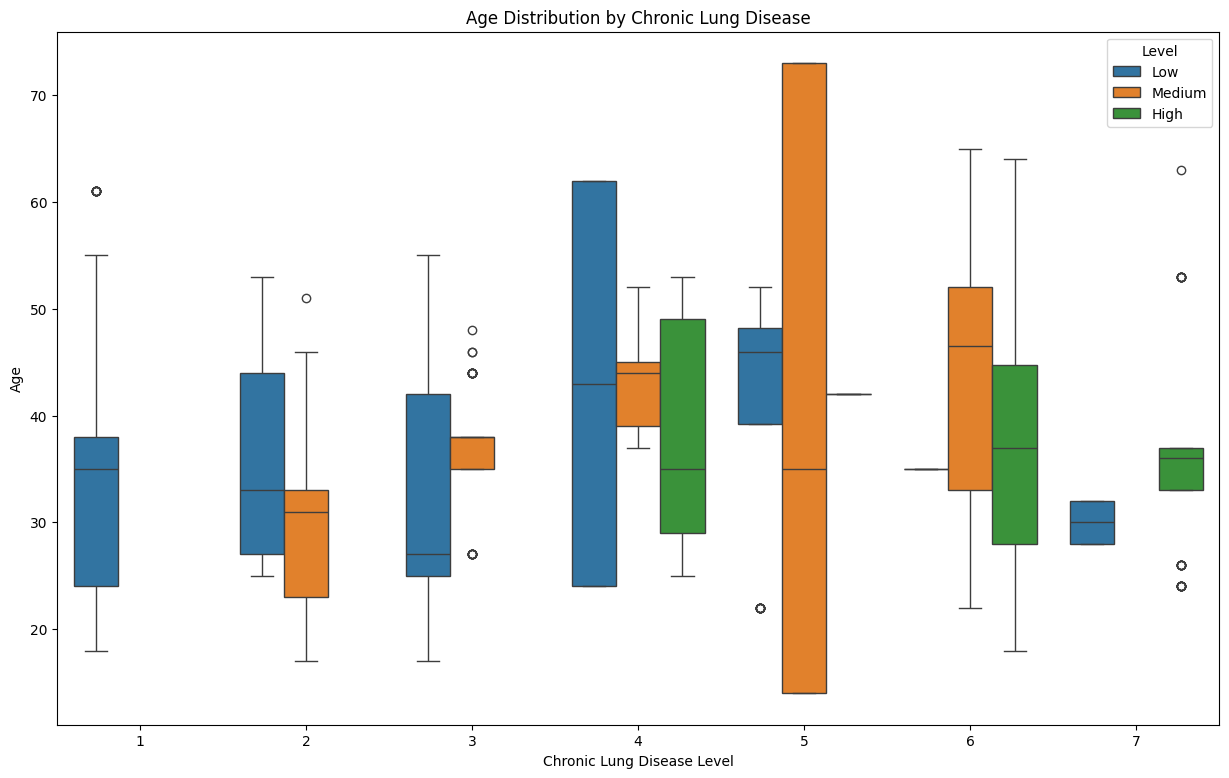

In [ ]:
plt.figure(figsize=(15, 9))
sns.boxplot(data= new_data,x='chronic Lung Disease',y='Age',hue='Level')
plt.title('Age Distribution by Chronic Lung Disease')
plt.xlabel('Chronic Lung Disease Level')
plt.ylabel('Age')
plt.show()



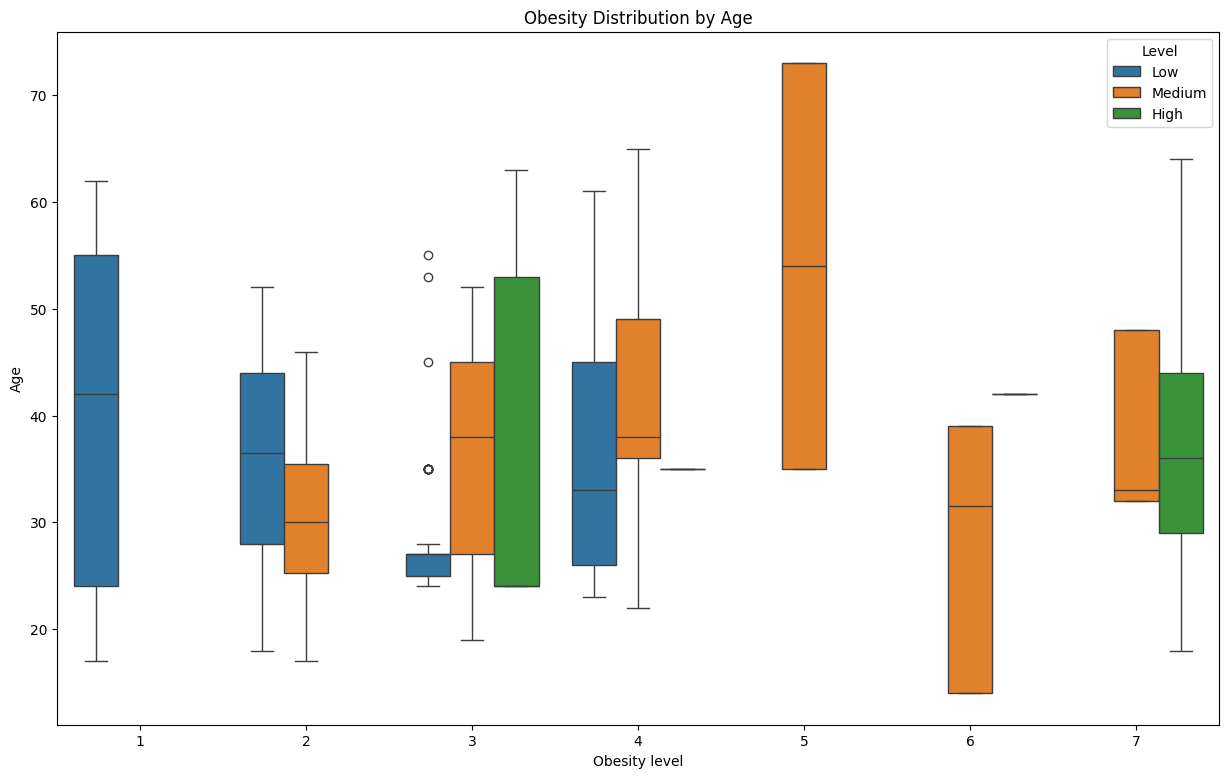

In [56]:
plt.figure(figsize=(15, 9))
sns.boxplot(data= new_data,x='Obesity',y='Age',hue='Level')
plt.title('Obesity Distribution by Age')
plt.xlabel('Obesity level')
plt.ylabel('Age')
plt.show()

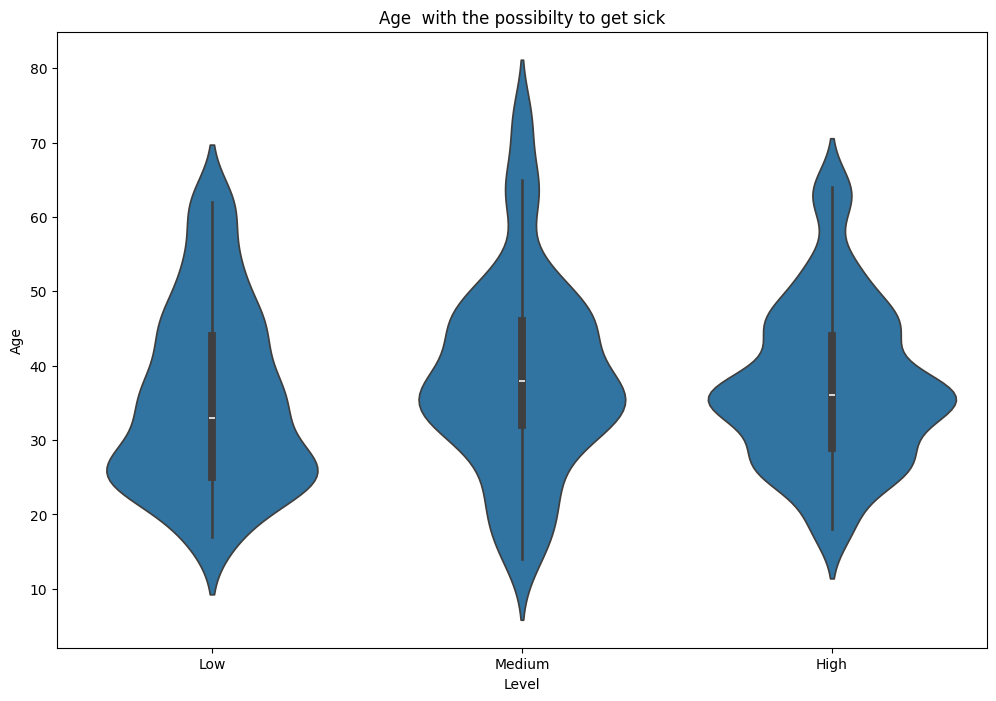

In [57]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Level', y='Age', data = new_data)
plt.title('Age  with the possibilty to get sick')
plt.show()

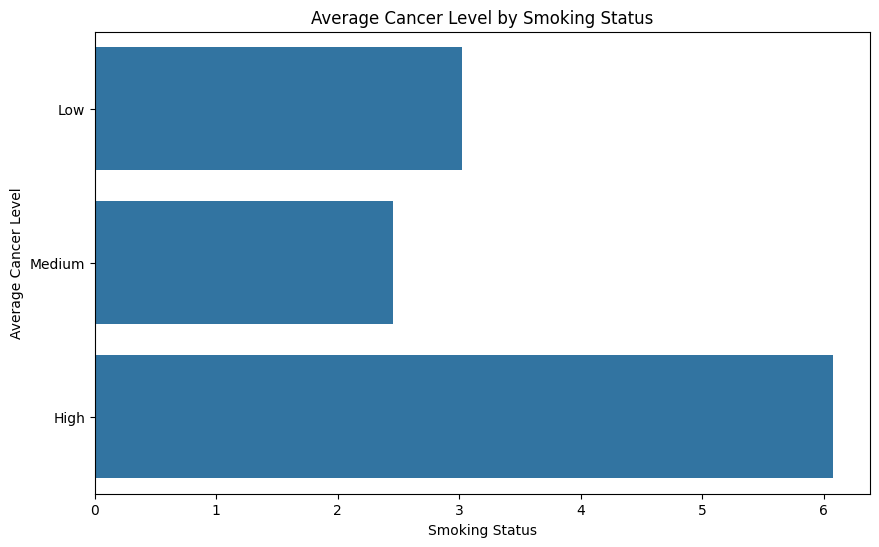

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Smoking', y='Level', data=new_data, errorbar=None)
plt.title('Average Cancer Level by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Average Cancer Level')
plt.show()

In [75]:
plt.figure(figsize=(10, 6))
smoking.plot(kind='bar', color='lightblue')
plt.title('Frequency of Smoking Status')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

NameError: name 'smoking' is not defined

<Figure size 1000x600 with 0 Axes>